In [5]:
from simulator_appliances_class import Appliance,Kettle,InductionHob,GasHob,Kitchen
from simulator_appliances_class import Microwave,GasOven,AirFryer,ElectricOven,find_optimal_device
from simulator_appliances_class import ElectricMokaPot,CoffeeMachine
from simulator_appliances_class import ThermomixTM6,BoschCookit
import pandas as pd
import itertools
import numpy as np
from joblib import Parallel, delayed
import sys
import os
sys.path.append(os.path.abspath(os.path.join("../../")))
from src.comparisons.grid import (
    generate_weight_combinations,
    evaluate_combination,
    compute_all_combinations_parallel
)
from pathlib import Path
import polars as pl 
import duckdb

# Kitchen

### Cooking

In [ ]:
df_cooking = Kitchen.compare_cooking_devices(time_minutes=30)
weights = {
    "cost_pln": 
    "time_min": 
    "normalized_comfort": 
    "normalized_failure_rate": 
    "co2_emission_kg": 
    "device_cost":
    "energy_kwh"

}
find_optimal_device(df_cooking, weights)


df_heating = Kitchen.compare_heating_devices(time_minutes=30)

weights = {
    "cost_pln": 
    "time_min": 
    "normalized_comfort": 
    "normalized_failure_rate": 
    "heating_quality":
    "co2_emission_kg":
    "device_cost":
    "energy_kwh"
}

df_coffee = Kitchen.compare_coffee_devices(cups=1)

weights = {
    "cost_pln": 
    "time_min": 
    "normalized_comfort": 
    "normalized_failure_rate"
    "co2_emission_kg":
    "device_cost":
    "energy_kwh"
}

find_optimal_device(df_coffee, weights)

df_robots = Kitchen.compare_multicookers(recipe_complexity=1.5)

weights = {
    "cooking_quality": 
    "cost_pln": 
    "time_min": ,
    "normalized_comfort":
    "normalized_failure_rate":
    "co2_emission_kg":
    "device_cost":
    "energy_kwh"
}


df_heaters = Bathroom.compare_water_heaters(liters=50)
weights = 
    "cost_pln": 
    "time_min": -
    "co2_per_kwh_heat": 
    "normalized_comfort": 
    "normalized_failure_rate": 
    "cost_per_kwh_heat": 
      "co2_emission_kg":
    "device_cost":
    "energy_kwh"
}

find_optimal_device(df_heaters, weights)

df_bath = Bathroom.compare_bathing_options()


weights = {
    "normalized_comfort":
    "normalized_failure_rate":    
    "cost_pln": 
    "time_min": 
    "co2_emission_kg": 
    "device_cost":
    "energy_kwh"

}

find_optimal_device(df_bath, weights)

df_air_heating = Bathroom.compare_bathroom_heating()
weights = {
    "cost_pln": 
    "time_min": 
    "co2_emission_kg": 
    "normalized_comfort": 
    "normalized_failure_rate": 
    "heating_quality": 
    "device_cost":
    "energy_kwh"
}

find_optimal_device(df_air_heating, weights)

df_work = Room.compare_workstations()

weights = {
    "cost_pln": 
    "time_min": -
    "co2_emission_kg": -
    "normalized_comfort": -
    "normalized_failure_rate": 
    "computing_quality": 
    "device_cost":
    "energy_kwh"
}

find_optimal_device(df_work, weights)

df_cooling = Room.compare_cooling_devices(duration_min=60)
weights = {
    "cost_pln": 
    "co2_emission_kg": 
    "normalized_comfort": 
    "normalized_failure_rate":
    "device_cost":
    "cooling_quality": 
    
}

find_optimal_device(df_cooling, weights)




In [ ]:
df_cooking = Kitchen.compare_cooking_devices(time_minutes=30)
weights = {
    "cost_pln": -0.4,
    "time_min": -0.3,
    "normalized_comfort": -0.2,
    "normalized_failure_rate": -0.1
}
find_optimal_device(df_cooking, weights)



,name,energy_kwh,cost_pln,time_min,co2_emission_kg,device_cost,normalized_comfort,normalized_failure_rate,score
0,GasHob,1.667,0.49,30.0,0.667,1500,0.75,0.455,-0.2
1,InductionHob,0.900,0.56,30.0,0.360,2100,0.25,0.545,-0.5


### Heating

In [4]:
df_heating = Kitchen.compare_heating_devices(time_minutes=30)

weights = {
    "cost_pln": -0.4,
    "time_min": -0.1,
    "normalized_comfort": -0.2,
    "normalized_failure_rate": -0.1,
    "heating_quality": 0.2
}

result = find_optimal_device(df_heating, weights)
result


,name,energy_kwh,cost_pln,time_min,co2_emission_kg,device_cost,heating_quality,normalized_comfort,normalized_failure_rate,score
0,Microwave,0.450,0.28,30,0.180,500,0.4,0.1,0.20,0.000000
1,AirFryer,0.750,0.46,30,0.300,800,0.7,0.2,0.25,-0.092667
2,GasOven,2.217,0.65,40,0.887,1800,0.9,0.4,0.25,-0.347333
3,ElectricOven,1.667,1.03,40,0.667,2000,0.7,0.3,0.30,-0.613333


### Coffee

In [5]:
df_coffee = Kitchen.compare_coffee_devices(cups=1)

weights = {
    "coffee_taste": 0.5,
    "cost_pln": -0.2,
    "time_min": -0.1,
    "normalized_comfort": -0.1,
    "normalized_failure_rate": -0.1
}

find_optimal_device(df_coffee, weights)


,name,energy_kwh,cost_pln,time_min,co2_emission_kg,device_cost,coffee_taste,normalized_comfort,normalized_failure_rate,score
0,CoffeeMachine,0.080,0.05,1.5,0.032,2000,0.90,0.333,0.385,0.3
1,ElectricMokaPot,0.045,0.03,3.0,0.018,300,0.78,0.667,0.615,-0.3


### Robots

In [6]:
df_robots = Kitchen.compare_multicookers(recipe_complexity=1.5)

weights = {
    "cooking_quality": 0.5,
    "cost_pln": -0.2,
    "time_min": -0.1,
    "normalized_comfort": -0.1,
    "normalized_failure_rate": -0.1
}

find_optimal_device(df_robots, weights)


,name,energy_kwh,cost_pln,time_min,co2_emission_kg,device_cost,cooking_quality,normalized_comfort,normalized_failure_rate,score
0,ThermomixTM6,1.125,0.70,30.0,0.45,5995,0.88,0.417,0.444,0.000000e+00
1,BoschCookit,1.350,0.84,33.0,0.54,6399,0.91,0.583,0.556,-2.775558e-17


# Bathroom


In [7]:
from simulator_appliances_class import Appliance, ElectricHeater, GasHeater, HeatPump, FlowHeater,Bathroom
from simulator_appliances_class import Bathtub, Shower
from simulator_appliances_class import LadderHeater,FloorHeating

### Water Heating

In [8]:
df_heaters = Bathroom.compare_water_heaters(liters=50)
weights = {
    "cost_pln": -0.3,
    "time_min": -0.2,
    "co2_per_kwh_heat": -0.2,
    "normalized_comfort": -0.1,
    "normalized_failure_rate": -0.1,
    "cost_per_kwh_heat": -0.1
}

find_optimal_device(df_heaters, weights)



,name,energy_kwh,cost_pln,time_min,co2_emission_kg,device_cost,co2_per_kwh_heat,cost_per_kwh_heat,normalized_comfort,normalized_failure_rate,score
0,HeatPump,0.775,0.48,38.759259,0.310,4500,0.133,0.333333,0.15,0.273,-0.171983
1,FlowHeater,2.326,1.44,19.933333,0.930,1000,0.400,1.000000,0.20,0.182,-0.468146
2,GasHeater,10.556,3.11,8.000000,2.006,1400,0.190,0.294737,0.40,0.318,-0.542697
3,ElectricHeater,2.326,1.44,69.766667,0.930,1200,0.400,0.650000,0.25,0.227,-0.632967


### Bath

In [9]:
df_bath = Bathroom.compare_bathing_options()


weights = {
    "comfort_penalty": -0.6,          
    "cost_pln": -0.2,
    "time_min": -0.1,
    "co2_emission_kg": -0.1

}

find_optimal_device(df_bath, weights)


,name,energy_kwh,cost_pln,time_min,co2_emission_kg,device_cost,normalized_comfort,normalized_failure_rate,score
0,Bathtub,6.105,3.78,15.0,2.442,2500,0.2,0.6,-0.4
1,Shower,2.930,1.82,8.0,1.172,2000,0.8,0.4,-0.6


### Air Heating

In [10]:
df_air_heating = Bathroom.compare_bathroom_heating()
weights = {
    "cost_pln": -0.3,
    "time_min": -0.2,
    "co2_emission_kg": -0.2,
    "normalized_comfort": -0.1,
    "normalized_failure_rate": -0.1,
    "heating_quality": 0.1
}

find_optimal_device(df_air_heating, weights)


,name,energy_kwh,cost_pln,time_min,co2_emission_kg,device_cost,heating_quality,normalized_comfort,normalized_failure_rate,score
0,LadderHeater,2.0,1.30,120.0,0.80,900,0.75,0.75,0.667,-0.2
1,FloorHeating,2.4,1.56,300.0,0.96,2000,0.95,0.25,0.333,-0.6


# Room 

### Desktop vs Laptop

In [11]:
from simulator_appliances_class import LaptopWithMonitor,DesktopComputer,Room, Fan, AirConditioner

In [12]:
df_work = Room.compare_workstations()

weights = {
    "cost_pln": -0.2,
    "time_min": -0.1,
    "co2_emission_kg": -0.1,
    "normalized_comfort": -0.1,
    "normalized_failure_rate": -0.2,
    "computing_quality": 0.3
}

find_optimal_device(df_work, weights)


,name,energy_kwh,cost_pln,time_min,co2_emission_kg,device_cost,computing_quality,normalized_comfort,normalized_failure_rate,score
0,DesktopComputer,0.90,0.58,360,0.360,4000,0.95,0.667,0.375,-0.1
1,LaptopWithMonitor,0.42,0.27,360,0.168,5000,0.85,0.333,0.625,-0.2


### Colling

In [13]:
df_cooling = Room.compare_cooling_devices(duration_min=60)
weights = {
    "cost_pln": -0.3,
    "co2_emission_kg": -0.2,
    "normalized_comfort": -0.1,
    "normalized_failure_rate": -0.1,
    "device_cost": -0.1,
    "cooling_quality": 0.2
}

find_optimal_device(df_cooling, weights)


,name,energy_kwh,cost_pln,time_min,co2_emission_kg,device_cost,cooling_quality,normalized_comfort,normalized_failure_rate,score
0,Fan,0.07,0.04,60,0.028,250,0.4,0.889,0.231,-0.1
1,AirConditioner,1.50,0.93,60,0.600,3000,0.9,0.111,0.769,-0.5


# Grid

In [15]:
df_cooking

,name,energy_kwh,cost_pln,time_min,comfort_penalty,co2_emission_kg,device_cost,failure_rate,normalized_comfort,normalized_failure_rate
0,InductionHob,0.900,0.56,30.0,0.05,0.360,2100,0.12,0.25,0.545
1,GasHob,1.667,0.49,30.0,0.15,0.667,1500,0.10,0.75,0.455


In [27]:
features = [
    "cost_pln",
    "co2_emission_kg",
]


results=compute_all_combinations_parallel(df_cooking, features, step=0.1, n_jobs=-1)

In [28]:
results

,cost_pln,co2_emission_kg,optimal_device,optimal_score
0,-1.000000e+00,-2.220446e-16,GasHob,-2.220446e-16
1,-9.000000e-01,-1.000000e-01,GasHob,-1.000000e-01
2,-9.000000e-01,1.000000e-01,GasHob,1.000000e-01
3,-8.000000e-01,-2.000000e-01,GasHob,-2.000000e-01
4,-8.000000e-01,2.000000e-01,GasHob,2.000000e-01
5,-7.000000e-01,-3.000000e-01,GasHob,-3.000000e-01
6,-7.000000e-01,3.000000e-01,GasHob,3.000000e-01
7,-6.000000e-01,-4.000000e-01,GasHob,-4.000000e-01
8,-6.000000e-01,4.000000e-01,GasHob,4.000000e-01
9,-5.000000e-01,-5.000000e-01,InductionHob,-5.000000e-01


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Przygotowanie danych
X = results[["cost_pln", "co2_emission_kg", "energy_kwh",
             "device_cost", "normalized_comfort",
             "normalized_failure_rate"]]
y = results["optimal_device"]

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trenowanie klasyfikatora
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Ocena klasyfikatora
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      GasHob       0.98      0.98      0.98      8536
InductionHob       0.98      0.98      0.98      9083

    accuracy                           0.98     17619
   macro avg       0.98      0.98      0.98     17619
weighted avg       0.98      0.98      0.98     17619



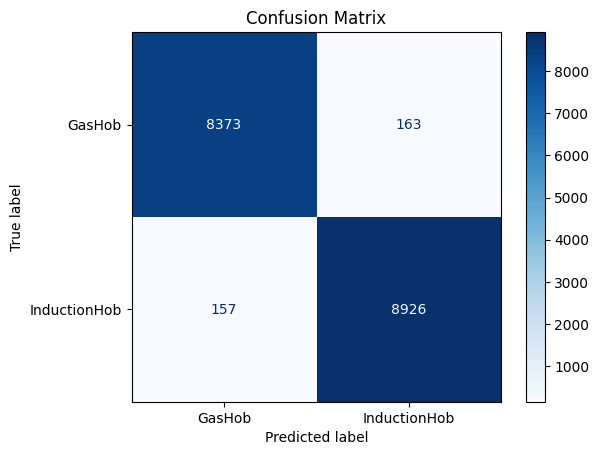

True Negative (GasHob poprawnie przewidziany): 8373
False Positive (GasHob błędnie jako InductionHob): 163
False Negative (InductionHob błędnie jako GasHob): 157
True Positive (InductionHob poprawnie przewidziany): 8926


In [26]:
cm = confusion_matrix(y_test, y_pred)

# Wyświetlanie
disp = ConfusionMatrixDisplay(cm, display_labels=["GasHob", "InductionHob"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Wyświetlanie szczegółowych informacji
tn, fp, fn, tp = cm.ravel()
print(f"True Negative (GasHob poprawnie przewidziany): {tn}")
print(f"False Positive (GasHob błędnie jako InductionHob): {fp}")
print(f"False Negative (InductionHob błędnie jako GasHob): {fn}")
print(f"True Positive (InductionHob poprawnie przewidziany): {tp}")

In [49]:
output_dir = output_dir = Path("../../Data/GRID")
output_dir.mkdir(parents=True, exist_ok=True)

df_cooking = Kitchen.compare_cooking_devices(time_minutes=30)
df_heating = Kitchen.compare_heating_devices(time_minutes=30)
df_coffee = Kitchen.compare_coffee_devices(cups=1)
df_robots = Kitchen.compare_multicookers(recipe_complexity=1.5)
df_heaters = Bathroom.compare_water_heaters(liters=50)
df_bath = Bathroom.compare_bathing_options()
df_air_heating = Bathroom.compare_bathroom_heating()
df_work = Room.compare_workstations()
df_cooling = Room.compare_cooling_devices(duration_min=60)


datasets = [
    ("cooking", "df_cooking", [
        "cost_pln", "time_min", "normalized_comfort", "normalized_failure_rate"
        "co2_emission_kg", "device_cost", "energy_kwh"
    ]),
    ("heating", "df_heating", [
        "cost_pln", "time_min", "normalized_comfort", "normalized_failure_rate",
        "heating_quality", "co2_emission_kg", "device_cost", "energy_kwh"
    ]),
    ("coffee", "df_coffee", [
        "cost_pln", "time_min", "normalized_comfort", "normalized_failure_rate",
        "co2_emission_kg", "device_cost", "energy_kwh"
    ]),
    ("robots", "df_robots", [
        "cooking_quality", "cost_pln", "time_min", "normalized_comfort",
        "normalized_failure_rate", "co2_emission_kg", "device_cost", "energy_kwh"
    ]),
    ("heaters", "df_heaters", [
        "cost_pln", "time_min", "co2_per_kwh_heat", "normalized_comfort",
        "normalized_failure_rate", "cost_per_kwh_heat", "co2_emission_kg",
        "device_cost", "energy_kwh"
    ]),
    ("bath", "df_bath", [
        "normalized_comfort", "normalized_failure_rate", "cost_pln",
        "time_min", "co2_emission_kg", "device_cost", "energy_kwh"
    ]),
    ("air_heating", "df_air_heating", [
        "cost_pln", "time_min", "co2_emission_kg", "normalized_comfort",
        "normalized_failure_rate", "heating_quality", "device_cost", "energy_kwh"
    ]),
    ("work", "df_work", [
        "cost_pln", "time_min", "co2_emission_kg", "normalized_comfort",
        "normalized_failure_rate", "computing_quality", "device_cost", "energy_kwh"
    ]),
    ("cooling", "df_cooling", [
        "cost_pln", "co2_emission_kg", "normalized_comfort",
        "normalized_failure_rate", "device_cost", "cooling_quality"
    ]),
]


for name, df_varname, features in datasets:
    try:
        df = globals()[df_varname]
        results = compute_all_combinations_parallel(df, features, step=0.1, n_jobs=-1)
        print(results.head())
        results.to_parquet(output_dir / f"{name}_grid.parquet", index=False)
        print(f"Zapisano wyniki dla {name} do {output_dir / f'{name}_grid.parquet'}")
    except KeyError:
        print(f"{df_varname} nie istnieje w przestrzeni nazw. Pomiń.")
    except Exception as e:
        print(f"Błąd podczas przetwarzania {name}: {e}")



KeyboardInterrupt: 

In [32]:
results

,cost_pln,co2_emission_kg,optimal_device,optimal_score
0,-1.000000e+00,-2.220446e-16,GasHob,-2.220446e-16
1,-9.000000e-01,-1.000000e-01,GasHob,-1.000000e-01
2,-9.000000e-01,1.000000e-01,GasHob,1.000000e-01
3,-8.000000e-01,-2.000000e-01,GasHob,-2.000000e-01
4,-8.000000e-01,2.000000e-01,GasHob,2.000000e-01
5,-7.000000e-01,-3.000000e-01,GasHob,-3.000000e-01
6,-7.000000e-01,3.000000e-01,GasHob,3.000000e-01
7,-6.000000e-01,-4.000000e-01,GasHob,-4.000000e-01
8,-6.000000e-01,4.000000e-01,GasHob,4.000000e-01
9,-5.000000e-01,-5.000000e-01,InductionHob,-5.000000e-01


### Merging all parquet

In [64]:


folder = Path("~/OneDrive - uek.krakow.pl/Pulpit/ISSI/Projekt_dyplomowy/DATA/GRID").expanduser()
con = duckdb.connect()

query = f"""
COPY (
    SELECT * FROM read_parquet('{str(folder)}/*.parquet', union_by_name=True)
) TO '{str(folder / "merged_grid.parquet")}' (FORMAT PARQUET);
"""

con.execute(query)

In [192]:
df_merged = pl.read_parquet(folder / "merged_grid.parquet")

In [193]:
df_merged

cost_pln,co2_emission_kg,normalized_comfort,normalized_failure_rate,device_cost,heating_quality,optimal_device,optimal_score,cooling_quality,cooking_quality,computing_quality
f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64
-1.0,0.0,0.0,0.0,0.0,0.0,"""LadderHeater""",0.0,null,null,null
-0.9,-0.1,0.0,0.0,0.0,0.0,"""LadderHeater""",0.0,null,null,null
-0.9,0.0,-0.1,0.0,0.0,0.0,"""LadderHeater""",-0.1,null,null,null
-0.9,0.0,0.0,-0.1,0.0,0.0,"""LadderHeater""",-0.1,null,null,null
-0.9,0.0,0.0,0.0,-0.1,0.0,"""LadderHeater""",0.0,null,null,null
…,…,…,…,…,…,…,…,…,…,…
0.9,0.0,0.0,0.0,0.1,null,"""DesktopComputer""",0.9,null,null,0.0
0.9,0.0,0.0,0.1,0.0,null,"""DesktopComputer""",0.9,null,null,0.0
0.9,0.0,0.1,0.0,0.0,null,"""DesktopComputer""",1.0,null,null,0.0


dobra czyli mapowanie w polarsie wyglada tak jesli maksymalna wartosc jest w zadanej kolumnie to wtedy stworz nowa kolumne i przypisz do segmentu df nazywa sie df_merged i wyglada tak unique_oparameter moze sie rownac= ['heating_quality','cooling_quality','cooking_quality','computing_quality'] rozumiesz co chce teraz zrobic? 

In [196]:
# Lista kolumn destymulant
destymulanty = ["co2_emission_kg", "normalized_comfort", "normalized_failure_rate","cost_pln"]

# Filtr: usuń wiersze z dodatnimi wartościami destymulant
mask_destymulanty = pl.any_horizontal([pl.col(c) > 0 for c in destymulanty])

# Filtr: usuń wiersze, gdzie unique_parameter (jeśli ustalony) ma wartość < 0
# Sprawdzamy dla heating/cooling/... czy są unikalne i < 0
quality_cols = ["heating_quality", "cooling_quality", "cooking_quality", "computing_quality"]

# Maska: jeśli dana jakość jest jedyną nie-null i < 0, to usuń
negative_stymulant_mask = pl.any_horizontal([
    (pl.col(q).is_not_null() & (pl.col(q) < 0)) for q in quality_cols
])

# Zastosuj oba filtry
df_filtered = df_merged.filter(~mask_destymulanty & ~negative_stymulant_mask)


In [197]:
df_filtered

cost_pln,co2_emission_kg,normalized_comfort,normalized_failure_rate,device_cost,heating_quality,optimal_device,optimal_score,cooling_quality,cooking_quality,computing_quality
f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64
-1.0,0.0,0.0,0.0,0.0,0.0,"""LadderHeater""",0.0,null,null,null
-0.9,-0.1,0.0,0.0,0.0,0.0,"""LadderHeater""",0.0,null,null,null
-0.9,0.0,-0.1,0.0,0.0,0.0,"""LadderHeater""",-0.1,null,null,null
-0.9,0.0,0.0,-0.1,0.0,0.0,"""LadderHeater""",-0.1,null,null,null
-0.9,0.0,0.0,0.0,-0.1,0.0,"""LadderHeater""",0.0,null,null,null
…,…,…,…,…,…,…,…,…,…,…
0.0,0.0,0.0,0.0,0.6,null,"""LaptopWithMonitor""",0.6,null,null,0.4
0.0,0.0,0.0,0.0,0.7,null,"""LaptopWithMonitor""",0.7,null,null,0.3
0.0,0.0,0.0,0.0,0.8,null,"""LaptopWithMonitor""",0.8,null,null,0.2


In [198]:
# --- NEGACJA ZNAKÓW TYLKO W df_filtered, BEZ RUSZANIA ZER ---
exclude_cols = set(quality_cols + ["device_cost"])
numeric_cols = [col for col in df_filtered.columns if df_filtered.schema[col] in [pl.Float64, pl.Float32, pl.Int64, pl.Int32]]
cols_to_negate = [col for col in numeric_cols if col not in exclude_cols]

df_filtered = df_filtered.with_columns([
    pl.when(pl.col(col) != 0).then(-pl.col(col)).otherwise(pl.col(col)).alias(col)
    for col in cols_to_negate
])


In [199]:
df_filtered

cost_pln,co2_emission_kg,normalized_comfort,normalized_failure_rate,device_cost,heating_quality,optimal_device,optimal_score,cooling_quality,cooking_quality,computing_quality
f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64
1.0,0.0,0.0,0.0,0.0,0.0,"""LadderHeater""",0.0,null,null,null
0.9,0.1,0.0,0.0,0.0,0.0,"""LadderHeater""",0.0,null,null,null
0.9,0.0,0.1,0.0,0.0,0.0,"""LadderHeater""",0.1,null,null,null
0.9,0.0,0.0,0.1,0.0,0.0,"""LadderHeater""",0.1,null,null,null
0.9,0.0,0.0,0.0,-0.1,0.0,"""LadderHeater""",0.0,null,null,null
…,…,…,…,…,…,…,…,…,…,…
0.0,0.0,0.0,0.0,0.6,null,"""LaptopWithMonitor""",-0.6,null,null,0.4
0.0,0.0,0.0,0.0,0.7,null,"""LaptopWithMonitor""",-0.7,null,null,0.3
0.0,0.0,0.0,0.0,0.8,null,"""LaptopWithMonitor""",-0.8,null,null,0.2


In [246]:
import polars as pl
import numpy as np

# --- DEFINICJE ---
# Kolumny destymulant
dest_cols = [
    "co2_emission_kg",
    "cost_pln",
    "normalized_comfort",
    "normalized_failure_rate",
    "device_cost"
]

# Kolumny jakościowe (stymulanty)
quality_cols = ["heating_quality", "cooling_quality", "cooking_quality", "computing_quality"]

all_weight_cols = dest_cols + quality_cols

# --- FILTROWANIE ---
# Usuń wiersze, gdzie destymulanty mają dodatnie wagi
mask_wrong_dest = pl.any_horizontal([
    pl.col(c) > 0 for c in ["co2_emission_kg", "normalized_comfort", "normalized_failure_rate", "cost_pln"]
])

# Usuń wiersze, gdzie stymulanta (jakość) ma ujemną wagę
mask_wrong_stymulant = pl.any_horizontal([
    pl.col(c).is_not_null() & (pl.col(c) < 0) for c in quality_cols
])

df_filtered = df_merged.filter(~mask_wrong_dest & ~mask_wrong_stymulant)

# --- NEGACJA ZNAKÓW (bez ruszania device_cost i quality_cols) ---
exclude_cols = set(quality_cols + ["device_cost"])
numeric_cols = [col for col in df_filtered.columns if df_filtered.schema[col] in [pl.Float64, pl.Float32, pl.Int64, pl.Int32]]
cols_to_negate = [col for col in numeric_cols if col not in exclude_cols]

df_filtered = df_filtered.with_columns([
    pl.when(pl.col(col) != 0).then(-pl.col(col)).otherwise(pl.col(col)).alias(col)
    for col in cols_to_negate
])

# --- ZLICZANIE NIE-NULL DLA QUALITY ---
not_null_counts = pl.sum_horizontal([
    pl.col(c).is_not_null().cast(pl.Int8) for c in quality_cols
])

# --- FUNKCJA DO UNIKALNEJ JAKOŚCI ---
def unique_param_expr():
    return (
        pl.when(not_null_counts == 1)
        .then(
            pl.when(pl.col("heating_quality").is_not_null()).then(pl.lit("heating_quality"))
            .when(pl.col("cooling_quality").is_not_null()).then(pl.lit("cooling_quality"))
            .when(pl.col("cooking_quality").is_not_null()).then(pl.lit("cooking_quality"))
            .when(pl.col("computing_quality").is_not_null()).then(pl.lit("computing_quality"))
        )
    )

# --- LISTA ABS WAG (bez null) ---
df_temp = df_filtered.with_columns([
    pl.concat_list([
        pl.when(pl.col(c).is_not_null()).then(pl.col(c).abs()) for c in all_weight_cols
    ]).alias("abs_weights_list_clean")
])

# --- SPRAWDZENIE BALANSU PRZEZ NUMPY ---
vectors = df_temp["abs_weights_list_clean"].to_list()
vectors = [[v for v in vec if v is not None] for vec in vectors]
is_balanced = np.array([
    np.all(np.array(vec) == vec[0]) if len(vec) > 0 else False for vec in vectors
])

df_temp_with_flag = df_temp.with_columns([
    pl.Series(name="is_balanced", values=is_balanced)
])

# --- MINIMUM DESTYMULANT ---
min_expr = pl.min_horizontal([pl.col(c) for c in dest_cols])
max_quality_expr = pl.max_horizontal([pl.col(c) for c in quality_cols])
max_abs_expr = pl.max_horizontal([pl.col(c).abs() for c in all_weight_cols])

# --- DODAJ max_quality_value, abs_device_cost, max_abs_weight ---
df_temp_with_max = df_temp_with_flag.with_columns([
    unique_param_expr().alias("unique_parameter"),
    max_quality_expr.alias("max_quality_value"),
    pl.col("device_cost").abs().alias("abs_device_cost"),
    max_abs_expr.alias("max_abs_weight")
])

# --- PRZYPISANIE PROFILU ---
df_final = df_temp_with_max.with_columns([
    # Balanced — wszystkie wagi identyczne
    pl.when(pl.col("is_balanced"))
        .then(pl.lit("Balanced"))

    # QualitySeeker — największy wpływ ma jedna z quality_cols
    .when(
        (pl.col("is_balanced") == False) &
        (pl.col("max_quality_value") == pl.col("max_abs_weight")) &
        (pl.col("max_quality_value") > 0)
    ).then(pl.lit("QualitySeeker"))

    # Bourgeois — największy wpływ ma dodatni device_cost
    .when(
        (pl.col("is_balanced") == False) &
        (pl.col("device_cost") > 0) &
        (pl.col("abs_device_cost") == pl.col("max_abs_weight"))
    ).then(pl.lit("Bourgeois"))

    # Budget — największy wpływ ma ujemny device_cost
    .when(
        (pl.col("is_balanced") == False) &
        (pl.col("device_cost") < 0) &
        (pl.col("abs_device_cost") == pl.col("max_abs_weight"))
    ).then(pl.lit("Budget"))

    # EcoFriendly — co2_emission_kg ma największy wpływ
    .when(
        (pl.col("is_balanced") == False) &
        (pl.col("co2_emission_kg").abs() == pl.col("max_abs_weight"))
    ).then(pl.lit("EcoFriendly"))

    # Saver — cost_pln ma największy wpływ
    .when(
        (pl.col("is_balanced") == False) &
        (pl.col("cost_pln").abs() == pl.col("max_abs_weight"))
    ).then(pl.lit("Saver"))

    # ComfortSeeker — normalized_comfort ma największy wpływ
    .when(
        (pl.col("is_balanced") == False) &
        (pl.col("normalized_comfort").abs() == pl.col("max_abs_weight"))
    ).then(pl.lit("ComfortSeeker"))

    # RiskAware — normalized_failure_rate ma największy wpływ
    .when(
        (pl.col("is_balanced") == False) &
        (pl.col("normalized_failure_rate").abs() == pl.col("max_abs_weight"))
    ).then(pl.lit("RiskAware"))

    # Fallback
    .otherwise(pl.lit("Unknown"))
    .alias("profile")
])


# --- CZYSZCZENIE ---
df_final = df_final.drop([
    "abs_weights_list_clean", "is_balanced", "max_quality_value", "abs_device_cost", "max_abs_weight"
])


In [235]:
df_temp_with_flag.filter(pl.col("is_balanced") == True)

cost_pln,co2_emission_kg,normalized_comfort,normalized_failure_rate,device_cost,heating_quality,optimal_device,optimal_score,cooling_quality,cooking_quality,computing_quality,abs_weights_list_clean,is_balanced
f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,list[f64],bool
0.2,0.2,0.2,0.2,-0.2,null,"""Shower""",0.2,null,null,null,"[0.2, 0.2, … null]",true
0.2,0.2,0.2,0.2,-0.2,null,"""ElectricMokaPot""",0.4,null,null,null,"[0.2, 0.2, … null]",true
0.2,0.2,0.2,0.2,-0.2,null,"""GasHob""",0.4,null,null,null,"[0.2, 0.2, … null]",true
0.2,0.2,0.2,0.2,-0.2,null,"""FlowHeater""",0.186117,null,null,null,"[0.2, 0.2, … null]",true


In [240]:
df_final.filter(pl.col("inferred_profile").is_null())

cost_pln,co2_emission_kg,normalized_comfort,normalized_failure_rate,device_cost,heating_quality,optimal_device,optimal_score,cooling_quality,cooking_quality,computing_quality,unique_parameter,inferred_profile
f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,str,str


In [244]:
df_final.filter((pl.col("inferred_profile")== "Saver") & (pl.col("optimal_device").is_in(["GasHob", "InductionHob"])))['optimal_device'].value_counts()

optimal_device,count
str,u32
"""GasHob""",265
"""InductionHob""",57


In [ ]:
df_final.write_parquet(folder / "grid_user_profile.parquet")

cost_pln,co2_emission_kg,normalized_comfort,normalized_failure_rate,device_cost,heating_quality,optimal_device,optimal_score,cooling_quality,cooking_quality,computing_quality,unique_parameter,inferred_profile
f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,str,str
1.0,0.0,0.0,0.0,0.0,0.0,"""LadderHeater""",0.0,null,null,null,"""heating_quality""","""Saver"""
0.9,0.1,0.0,0.0,0.0,0.0,"""LadderHeater""",0.0,null,null,null,"""heating_quality""","""Saver"""
0.9,0.0,0.1,0.0,0.0,0.0,"""LadderHeater""",0.1,null,null,null,"""heating_quality""","""Saver"""
0.9,0.0,0.0,0.1,0.0,0.0,"""LadderHeater""",0.1,null,null,null,"""heating_quality""","""Saver"""
0.9,0.0,0.0,0.0,-0.1,0.0,"""LadderHeater""",0.0,null,null,null,"""heating_quality""","""Saver"""
…,…,…,…,…,…,…,…,…,…,…,…,…
0.0,0.0,0.0,0.0,0.6,null,"""LaptopWithMonitor""",-0.6,null,null,0.4,"""computing_quality""","""Bourgeois"""
0.0,0.0,0.0,0.0,0.7,null,"""LaptopWithMonitor""",-0.7,null,null,0.3,"""computing_quality""","""Bourgeois"""
0.0,0.0,0.0,0.0,0.8,null,"""LaptopWithMonitor""",-0.8,null,null,0.2,"""computing_quality""","""Bourgeois"""


In [256]:
N = 3

profiles = df_saved.select("profile").unique().to_series().to_list()


sampled_dfs = [
    df_saved.filter(pl.col("profile") == profile).sample(n=N, with_replacement=False)
    for profile in profiles
]


df_samples_saved = pl.concat(sampled_dfs)


In [248]:
df_final.write_parquet(folder / "grid_with_profiles.parquet")

In [257]:
df_samples

cost_pln,co2_emission_kg,normalized_comfort,normalized_failure_rate,device_cost,heating_quality,optimal_device,optimal_score,cooling_quality,cooking_quality,computing_quality,unique_parameter,inferred_profile
f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,str,str
0.2,0.2,0.2,0.2,-0.2,null,"""Shower""",0.2,null,null,null,null,"""Balanced"""
0.2,0.2,0.2,0.2,-0.2,null,"""FlowHeater""",0.186117,null,null,null,null,"""Balanced"""
0.2,0.2,0.2,0.2,-0.2,null,"""GasHob""",0.4,null,null,null,null,"""Balanced"""
0.1,0.0,0.5,0.0,-0.4,null,"""CoffeeMachine""",0.5,null,null,null,null,"""ComfortSeeker"""
0.0,0.0,0.6,0.1,0.3,0.0,"""Microwave""",0.0,null,null,null,"""heating_quality""","""ComfortSeeker"""
…,…,…,…,…,…,…,…,…,…,…,…,…
0.0,0.1,0.3,0.3,-0.3,0.0,"""FloorHeating""",0.4,null,null,null,"""heating_quality""","""Budget"""
0.0,0.3,0.3,0.0,-0.4,null,"""Shower""",0.3,null,null,null,null,"""Budget"""
0.1,0.0,0.4,0.5,0.0,null,"""CoffeeMachine""",0.1,null,null,null,null,"""RiskAware"""


In [258]:
df_samples_saved

cost_pln,co2_emission_kg,normalized_comfort,normalized_failure_rate,device_cost,heating_quality,optimal_device,optimal_score,cooling_quality,cooking_quality,computing_quality,unique_parameter,profile
f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,str,str
0.0,0.0,0.2,0.6,-0.1,0.1,"""Microwave""",0.0,null,null,null,"""heating_quality""","""RiskAware"""
0.1,0.2,0.1,0.3,-0.2,0.1,"""Microwave""",0.0,null,null,null,"""heating_quality""","""RiskAware"""
0.2,0.2,0.0,0.3,-0.2,null,"""ThermomixTM6""",0.0,null,0.1,null,"""cooking_quality""","""RiskAware"""
0.2,0.6,0.2,0.0,0.0,null,"""ThermomixTM6""",0.0,null,0.0,null,"""cooking_quality""","""EcoFriendly"""
0.0,0.4,0.2,0.0,-0.2,0.2,"""Microwave""",0.0,null,null,null,"""heating_quality""","""EcoFriendly"""
…,…,…,…,…,…,…,…,…,…,…,…,…
0.3,0.1,0.0,0.2,-0.4,0.0,"""Microwave""",0.0,null,null,null,"""heating_quality""","""Budget"""
0.3,0.3,0.0,0.0,-0.3,null,"""ThermomixTM6""",0.0,null,0.1,null,"""cooking_quality""","""Budget"""
0.0,0.0,0.7,0.3,0.0,null,"""AirConditioner""",0.3,0.0,null,null,"""cooling_quality""","""ComfortSeeker"""


In [ ]:
""" 
co2_emission_kg: destymulanta 
cost_pln: destymulanta
normalized_comfort: destymulanta
normalized_failure_rate: destymulanta
device_cost: destymulanta
unique_parameter: stymulanta

Tzn 1 oznacza pierwsze miejsce w sortowaniu od najmniejszej do największej wartości wg wagi,
Moduł z wagi oznacza jej ważność zaś + lub - oznacza czy jest to stymulanta czy destymulanta. 
"""

USER_PROFILES = {
    "EcoFriendly": {
        "co2_emission_kg": 1,                     # zawsze 1
        "cost_pln": [2, 3, 4, 5, 6],
        "normalized_comfort": [2, 3, 4, 5, 6],
        "normalized_failure_rate": [2, 3, 4, 5, 6],
        "device_cost": [2, 3, 4, 5, 6],
        "unique_parameter": [2, 3, 4, 5, 6]
    },
    "Saver": {
        "co2_emission_kg": [2, 3, 4, 5, 6],
        "cost_pln": 1,                            # zawsze 1
        "normalized_comfort": [2, 3, 4, 5, 6],
        "normalized_failure_rate": [2, 3, 4, 5, 6],
        "device_cost": [2, 3, 4, 5, 6],
        "unique_parameter": [2, 3, 4, 5, 6]
    },
    "ComfortSeeker": {
        "co2_emission_kg": [2, 3, 4, 5, 6],
        "cost_pln": [2, 3, 4, 5, 6],
        "normalized_comfort": 1,                  # zawsze 1
        "normalized_failure_rate": [2, 3, 4, 5, 6],
        "device_cost": [2, 3, 4, 5, 6],
        "unique_parameter": [2, 3, 4, 5, 6]
    },
    "Balanced": {
        "co2_emission_kg": [1, 2, 3, 4, 5, 6],
        "cost_pln": [1, 2, 3, 4, 5, 6],
        "normalized_comfort": [1, 2, 3, 4, 5, 6],
        "normalized_failure_rate": [1, 2, 3, 4, 5, 6],
        "device_cost": [1, 2, 3, 4, 5, 6],
        "unique_parameter": [1, 2, 3, 4, 5, 6]
    },
    "QualitySeeker": {
        "co2_emission_kg": [1, 2, 3, 4, 6],
        "cost_pln": [1, 2, 3, 4, 6],
        "normalized_comfort": [1, 2, 3, 4, 6],
        "normalized_failure_rate": [1, 2, 3, 4, 6],
        "device_cost": [1, 2, 3, 4, 6],
        "unique_parameter": 5                     # zawsze 5
    },
    "Budget": {
        "co2_emission_kg": [2, 3, 4, 5, 6],
        "cost_pln": [2, 3, 4, 5, 6],
        "normalized_comfort": [2, 3, 4, 5, 6],
        "normalized_failure_rate": [2, 3, 4, 5, 6],
        "device_cost": 1,                         # zawsze 1
        "unique_parameter": [2, 3, 4, 5, 6]
    },
    "RiskAware": {
        "co2_emission_kg": [2, 3, 4, 5, 6],
        "cost_pln": [2, 3, 4, 5, 6],
        "normalized_comfort": [2, 3, 4, 5, 6],
        "normalized_failure_rate": 1,             # zawsze 1
        "device_cost": [2, 3, 4, 5, 6],
        "unique_parameter": [2, 3, 4, 5, 6]
    }
}
czy

In [249]:
df_final

cost_pln,co2_emission_kg,normalized_comfort,normalized_failure_rate,device_cost,heating_quality,optimal_device,optimal_score,cooling_quality,cooking_quality,computing_quality,unique_parameter,profile
f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,str,str
1.0,0.0,0.0,0.0,0.0,0.0,"""LadderHeater""",0.0,null,null,null,"""heating_quality""","""Saver"""
0.9,0.1,0.0,0.0,0.0,0.0,"""LadderHeater""",0.0,null,null,null,"""heating_quality""","""Saver"""
0.9,0.0,0.1,0.0,0.0,0.0,"""LadderHeater""",0.1,null,null,null,"""heating_quality""","""Saver"""
0.9,0.0,0.0,0.1,0.0,0.0,"""LadderHeater""",0.1,null,null,null,"""heating_quality""","""Saver"""
0.9,0.0,0.0,0.0,-0.1,0.0,"""LadderHeater""",0.0,null,null,null,"""heating_quality""","""Saver"""
…,…,…,…,…,…,…,…,…,…,…,…,…
0.0,0.0,0.0,0.0,0.6,null,"""LaptopWithMonitor""",-0.6,null,null,0.4,"""computing_quality""","""Bourgeois"""
0.0,0.0,0.0,0.0,0.7,null,"""LaptopWithMonitor""",-0.7,null,null,0.3,"""computing_quality""","""Bourgeois"""
0.0,0.0,0.0,0.0,0.8,null,"""LaptopWithMonitor""",-0.8,null,null,0.2,"""computing_quality""","""Bourgeois"""


In [260]:
df_saved=pl.read_parquet(folder / "grid_user_profile.parquet")

In [261]:
df_saved

cost_pln,co2_emission_kg,normalized_comfort,normalized_failure_rate,device_cost,heating_quality,optimal_device,optimal_score,cooling_quality,cooking_quality,computing_quality,unique_parameter,profile
f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,str,str
1.0,0.0,0.0,0.0,0.0,0.0,"""LadderHeater""",0.0,null,null,null,"""heating_quality""","""Saver"""
0.9,0.1,0.0,0.0,0.0,0.0,"""LadderHeater""",0.0,null,null,null,"""heating_quality""","""Saver"""
0.9,0.0,0.1,0.0,0.0,0.0,"""LadderHeater""",0.1,null,null,null,"""heating_quality""","""Saver"""
0.9,0.0,0.0,0.1,0.0,0.0,"""LadderHeater""",0.1,null,null,null,"""heating_quality""","""Saver"""
0.9,0.0,0.0,0.0,-0.1,0.0,"""LadderHeater""",0.0,null,null,null,"""heating_quality""","""Saver"""
…,…,…,…,…,…,…,…,…,…,…,…,…
0.0,0.0,0.0,0.0,0.6,null,"""LaptopWithMonitor""",-0.6,null,null,0.4,"""computing_quality""","""Bourgeois"""
0.0,0.0,0.0,0.0,0.7,null,"""LaptopWithMonitor""",-0.7,null,null,0.3,"""computing_quality""","""Bourgeois"""
0.0,0.0,0.0,0.0,0.8,null,"""LaptopWithMonitor""",-0.8,null,null,0.2,"""computing_quality""","""Bourgeois"""
